Problem Statement:

    Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. 
    Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
    In this project, you are provided a dataset which has the details of the insurance policy along with 
    the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In [1]:
# Import important libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn .metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
# see all the rows and columns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Data Inspection:

In [5]:
data.shape    # Total rows and columns

(1000, 40)

In [6]:
data.info()   # Information regarding datatype and also non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# detecting missing values:


data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 column is having all data as null so we can straight away drop that feature.

In [8]:
data.drop('_c39',axis=1,inplace=True)

In [9]:
data.shape

(1000, 39)

In [10]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


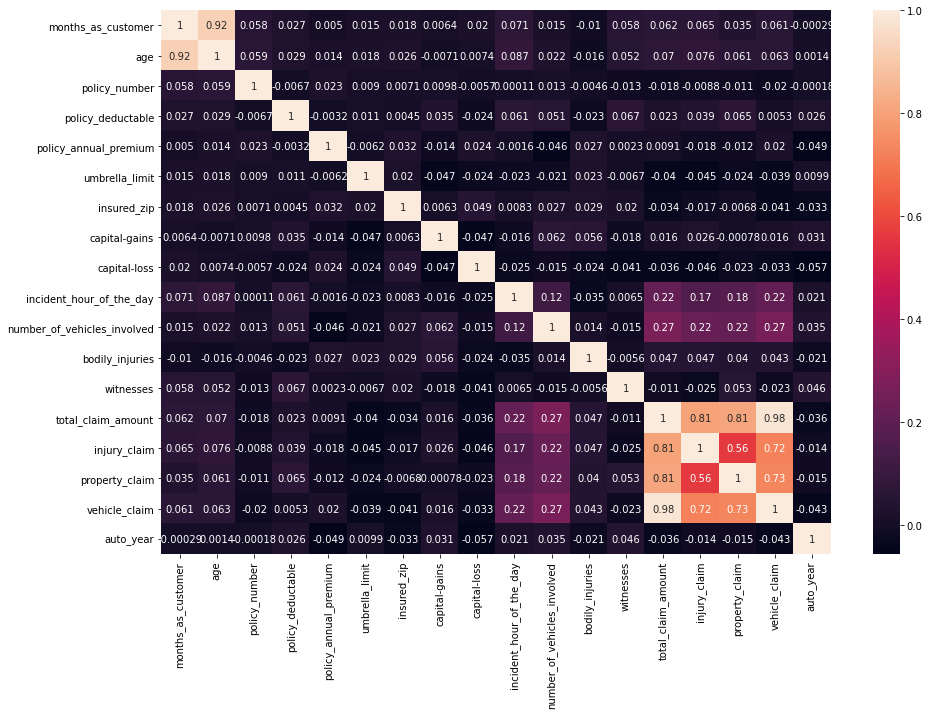

In [11]:
# See the correlation between the features:


plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

# EDA

In [12]:
# Seperating the categorical variables:

categorical=[feature for feature in data.columns if data[feature].dtype=='O']
print("No of categorical variables:",len(categorical))
categorical

No of categorical variables: 21


['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [13]:
# See the uniqueness of categorical variables:

data[categorical].nunique()

policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                4
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               3
police_report_available       3
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

In [14]:
# Seperating the numerical variables:

numerical=[feature for feature in data.columns if data[feature].dtype!='O']
print("No of numerical variables:",len(numerical))
numerical

No of numerical variables: 18


['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

<Figure size 360x360 with 0 Axes>

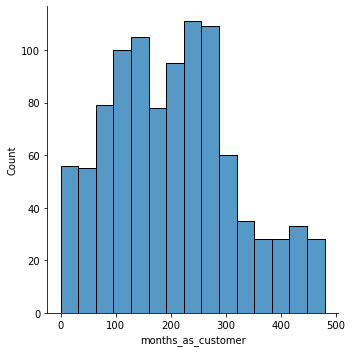

<Figure size 360x360 with 0 Axes>

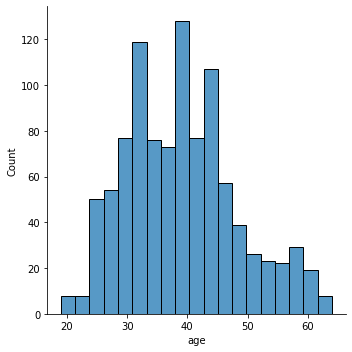

<Figure size 360x360 with 0 Axes>

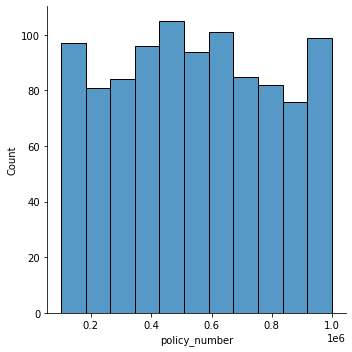

<Figure size 360x360 with 0 Axes>

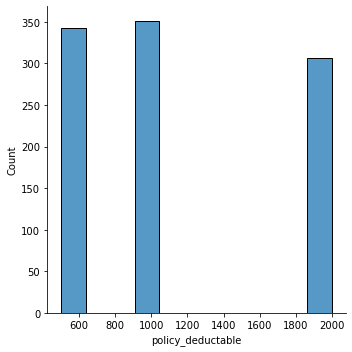

<Figure size 360x360 with 0 Axes>

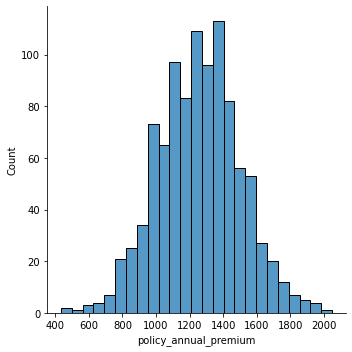

<Figure size 360x360 with 0 Axes>

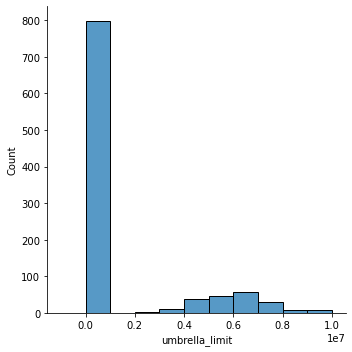

<Figure size 360x360 with 0 Axes>

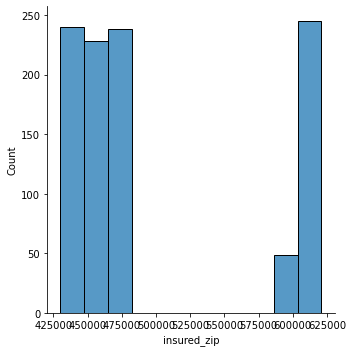

<Figure size 360x360 with 0 Axes>

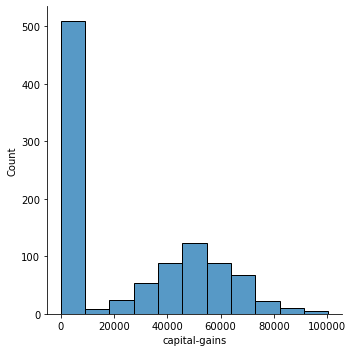

<Figure size 360x360 with 0 Axes>

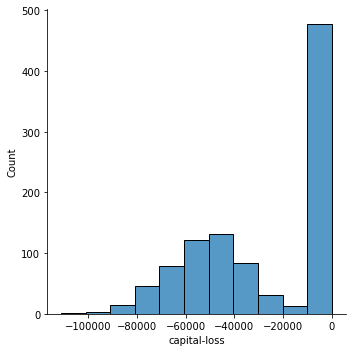

<Figure size 360x360 with 0 Axes>

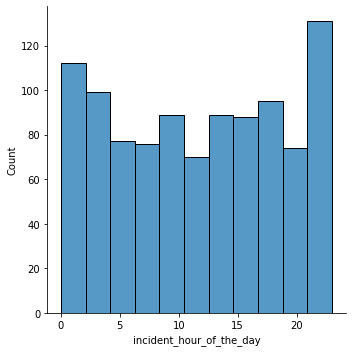

<Figure size 360x360 with 0 Axes>

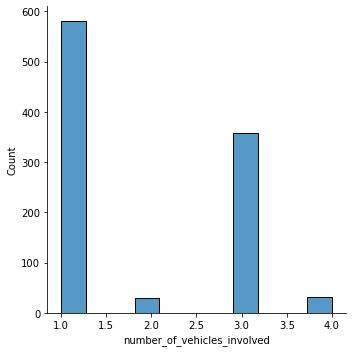

<Figure size 360x360 with 0 Axes>

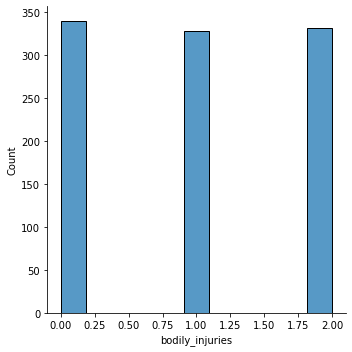

<Figure size 360x360 with 0 Axes>

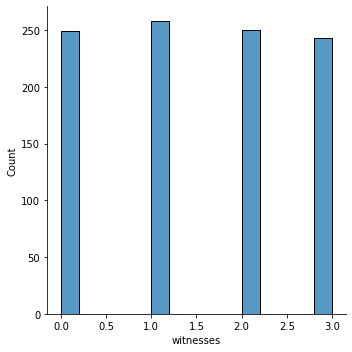

<Figure size 360x360 with 0 Axes>

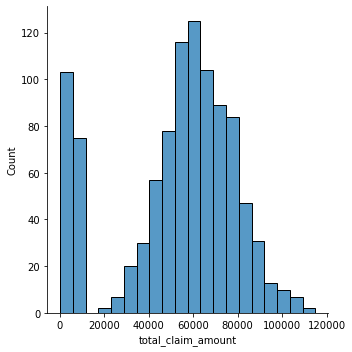

<Figure size 360x360 with 0 Axes>

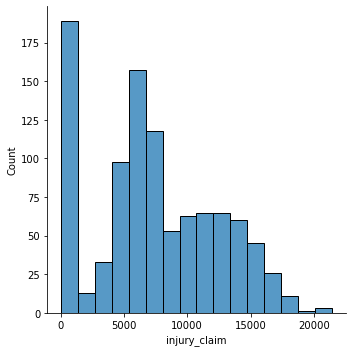

<Figure size 360x360 with 0 Axes>

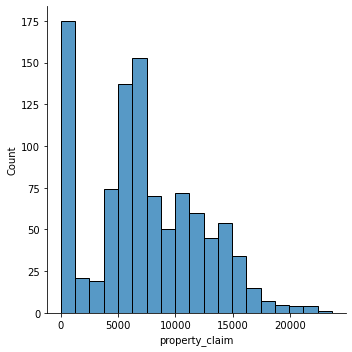

<Figure size 360x360 with 0 Axes>

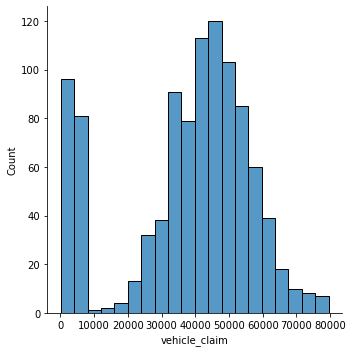

<Figure size 360x360 with 0 Axes>

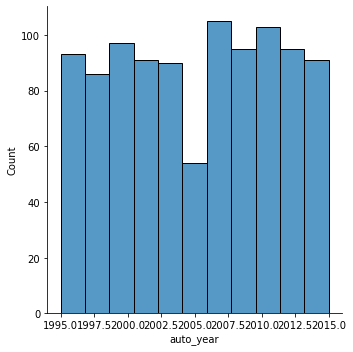

In [15]:
# lets see the skewness in numerical variables:

for i in numerical:
    plt.figure(figsize=(5,5))
    sns.displot(data[i])
    plt.show()

Observation:

1. Most 40 around years people are taking the insurance claim most
2. Policy annual premium seems normally distributed.
3. Umbreela limit data is having outliers.
4. Capital gain data is normally distributed but having outliers.
5. Same with capital loss feature.
6. Incident  hour is maximum at mid night.
7. Vehicle involvement is mostly 1 followed by 3.
8. Total claim amount is normally distributed but having outliers.
9. Injury claimis normally distributed.
10. Same with property claim.
11. vehicle  claim is normally distributed.


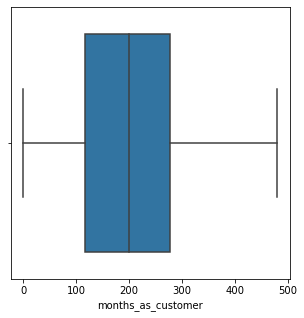

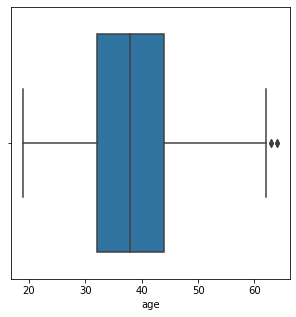

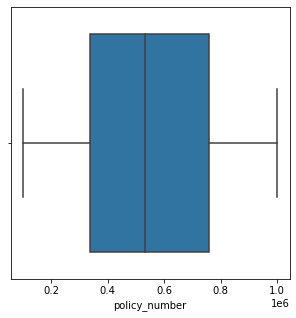

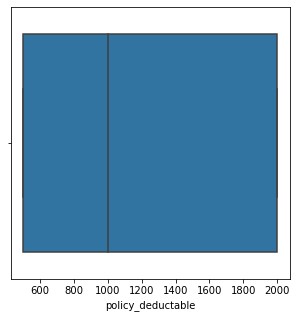

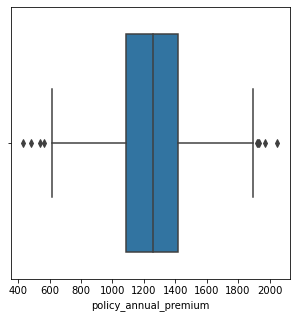

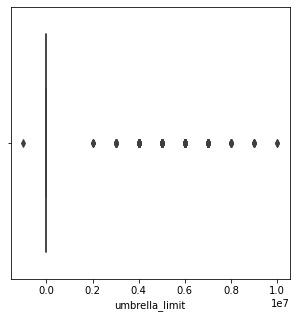

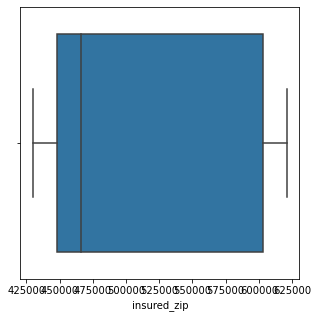

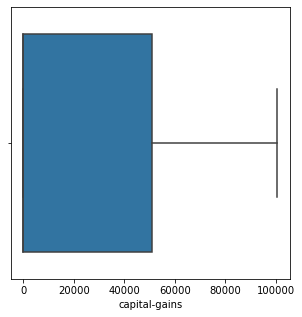

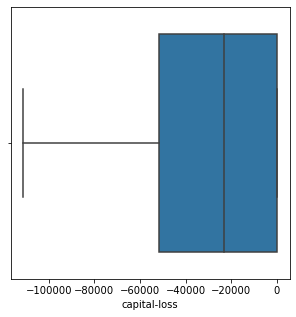

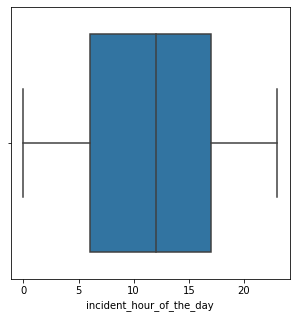

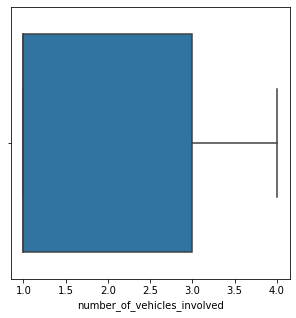

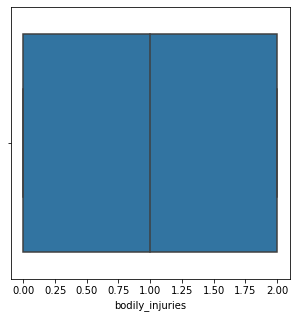

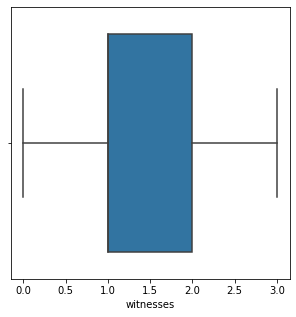

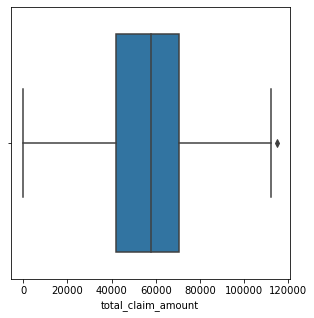

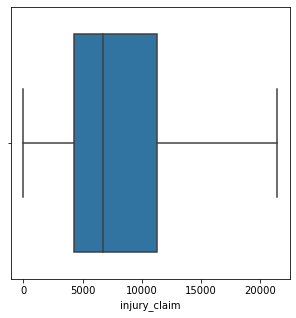

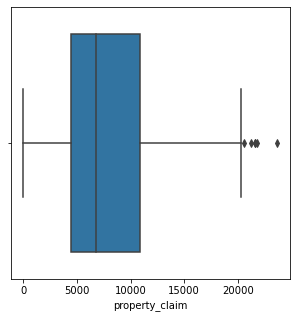

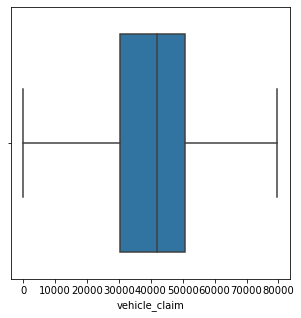

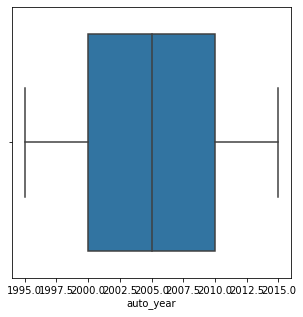

In [16]:
# lets see the Outliers in numerical variables:

for i in numerical:
    plt.figure(figsize=(5,5))
    sns.boxplot(data[i])
    plt.show()

Umbrella claim , Policy annual premium,Total claim amount and property claim is having slight outliers.

In [17]:
# See the values counts of categorical variables:

for i in categorical:
    print("Variable:",i,'',data[i].value_counts())

Variable: policy_bind_date  01-01-2006    3
05-08-1992    3
28-04-1992    3
20-07-1991    2
07-12-1995    2
29-01-1998    2
25-12-2013    2
07-11-1997    2
04-05-2000    2
03-01-2004    2
21-12-2002    2
25-09-2001    2
09-03-2003    2
16-07-2002    2
09-07-2002    2
15-05-1997    2
07-07-1996    2
05-01-1992    2
25-05-1990    2
03-02-1997    2
21-09-2005    2
09-08-2004    2
22-08-1991    2
20-09-1990    2
29-09-1999    2
27-07-2014    2
14-12-1991    2
04-06-2000    2
06-05-2007    2
16-05-2008    2
30-08-1993    2
11-03-2010    2
19-09-1995    2
28-12-1991    2
14-04-1992    2
05-07-2014    2
07-04-1999    2
24-06-1990    2
14-07-1997    2
07-12-1999    2
28-01-2010    2
15-11-1997    2
08-11-2009    2
11-11-1998    2
21-09-1996    2
28-12-2002    2
12-07-2006    1
26-08-2013    1
22-03-2000    1
25-11-2002    1
27-04-2009    1
29-05-1995    1
18-02-2007    1
10-02-2007    1
01-02-1990    1
28-09-2011    1
11-01-2009    1
04-06-1996    1
30-06-2000    1
13-04-1991    1
08-07-2001  

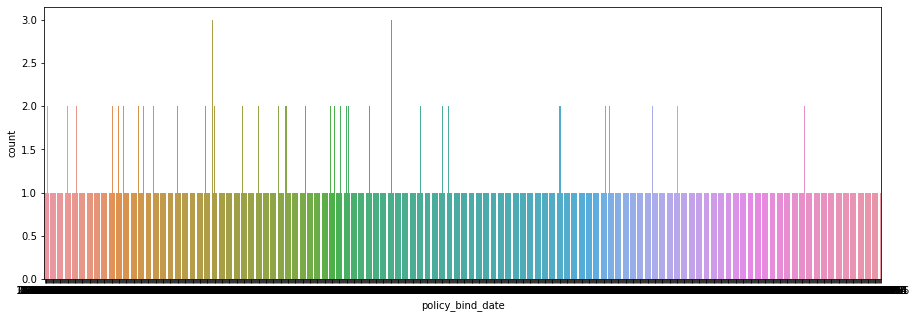

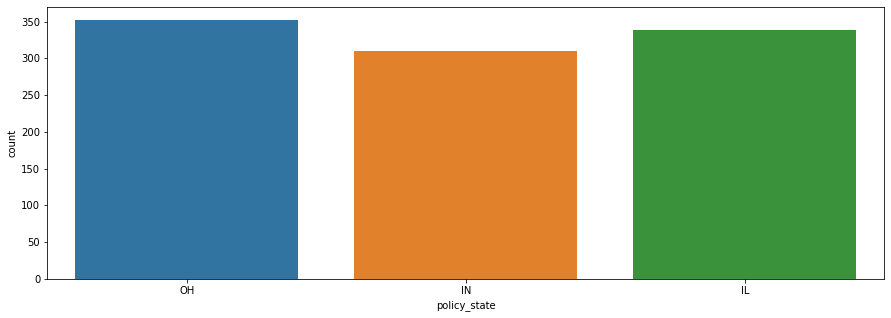

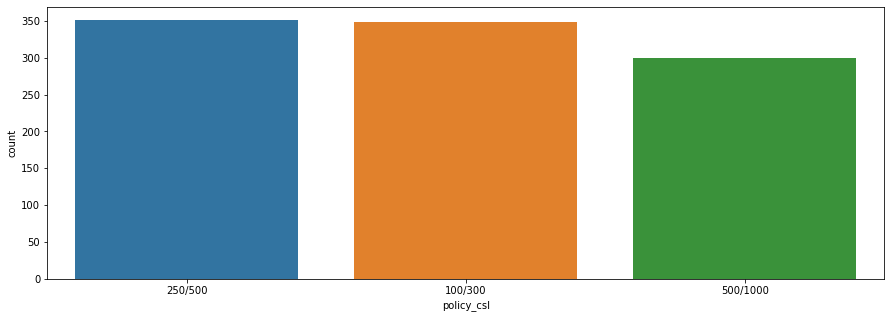

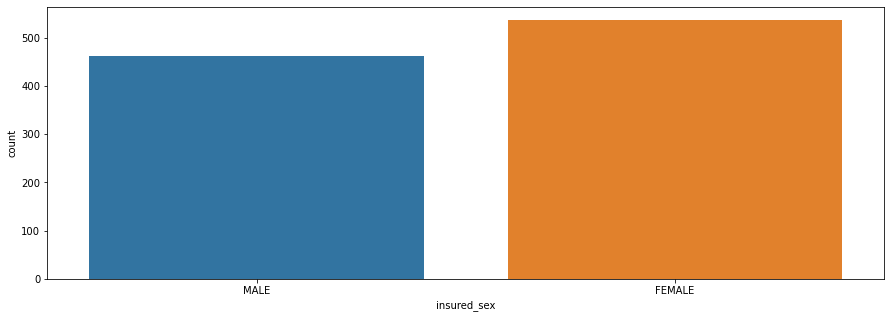

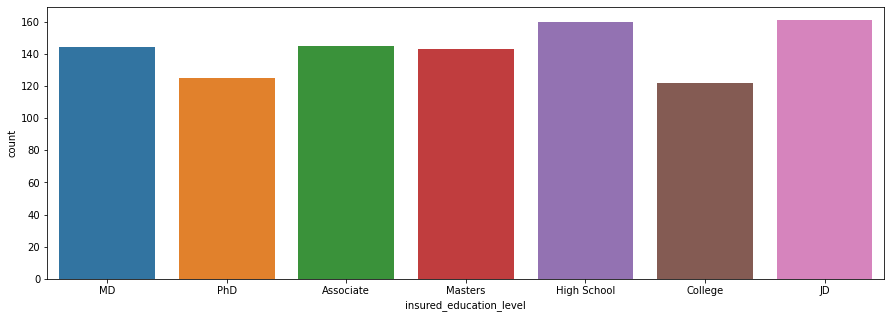

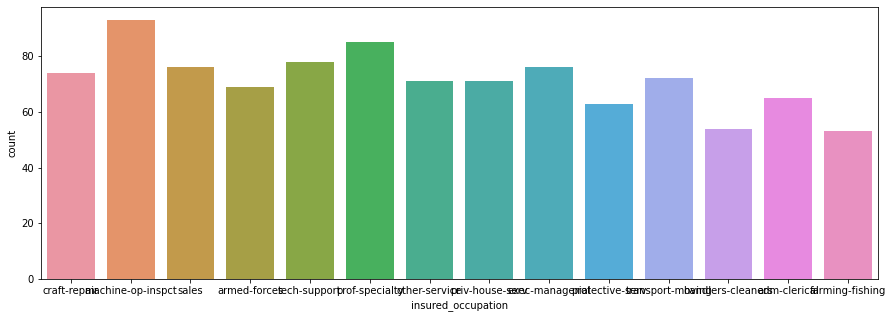

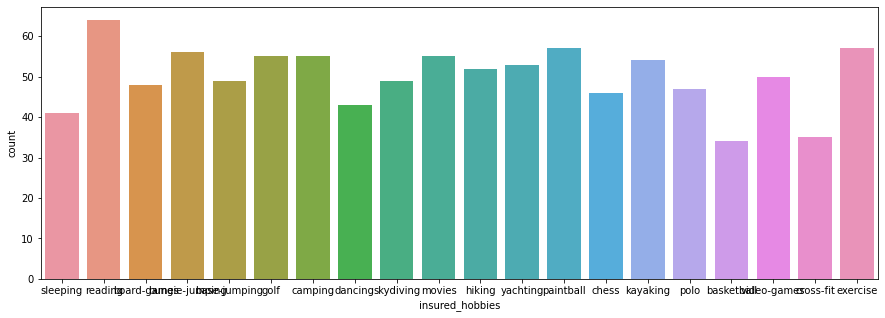

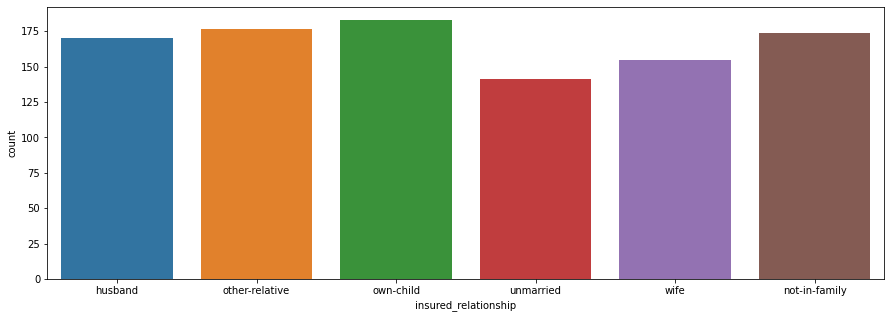

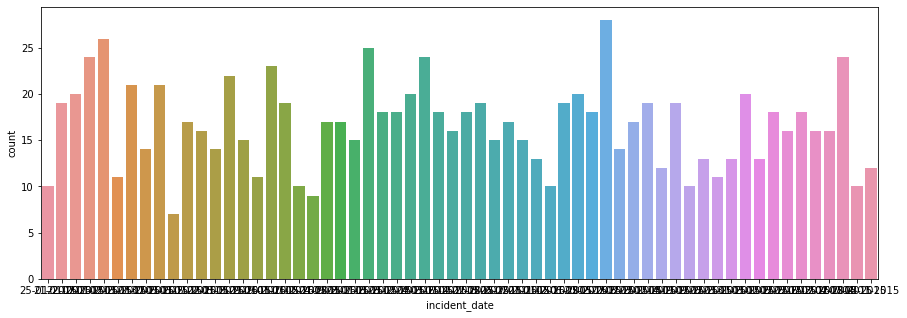

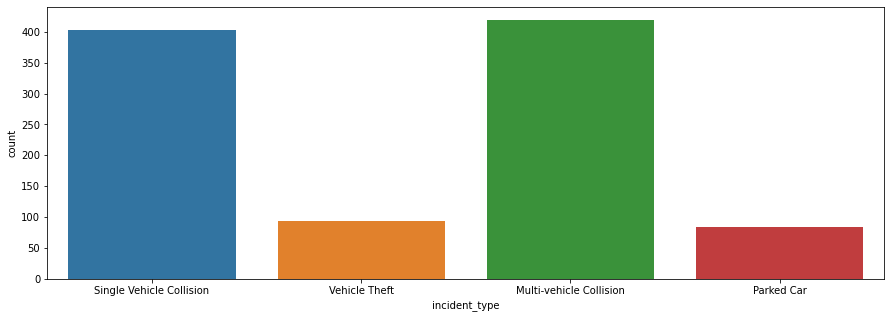

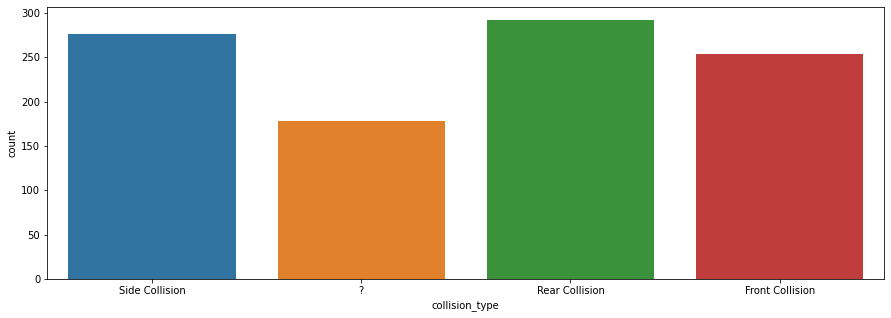

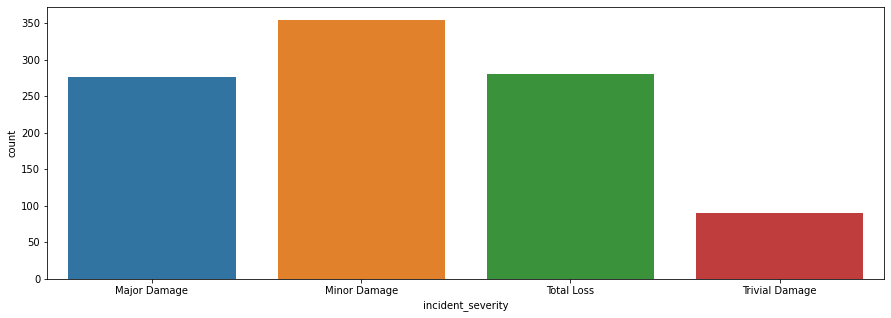

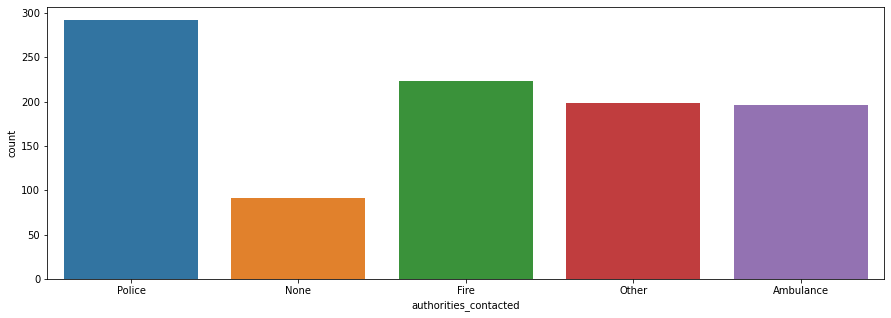

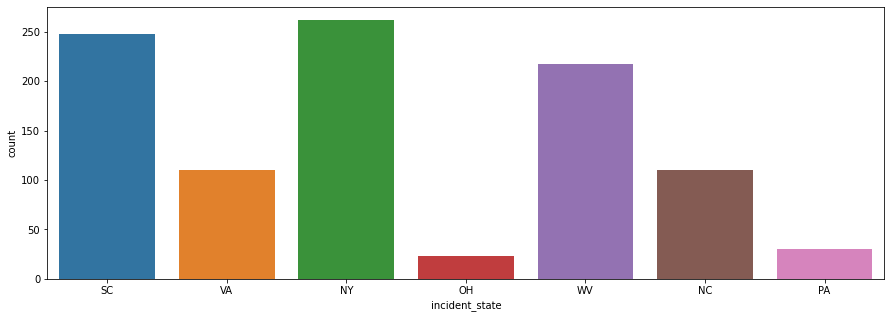

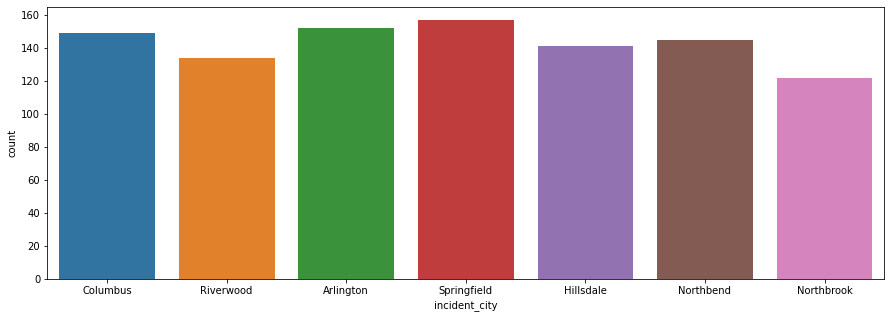

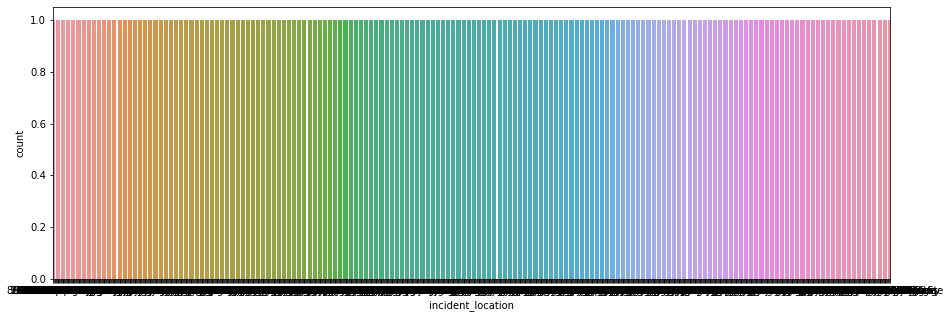

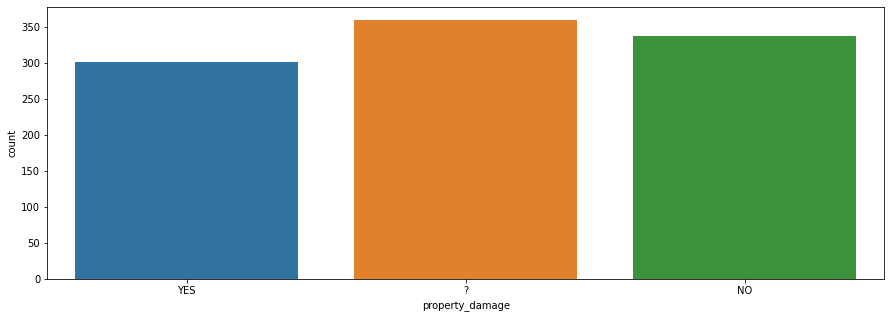

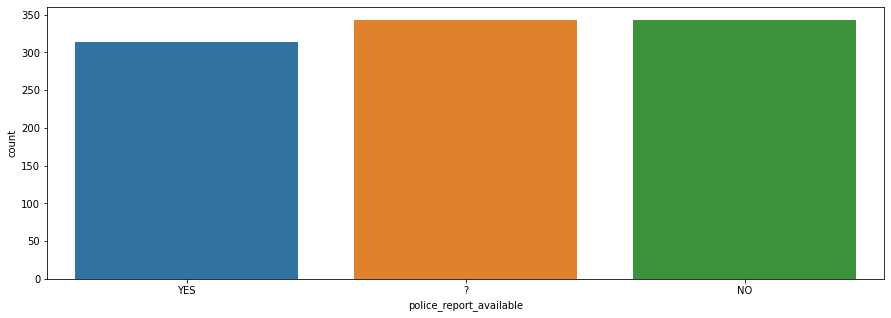

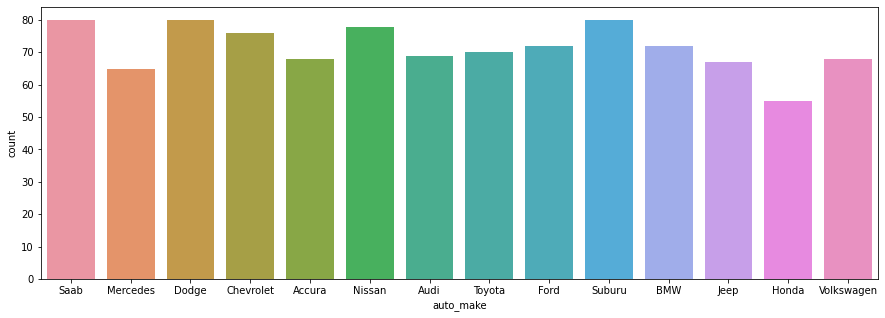

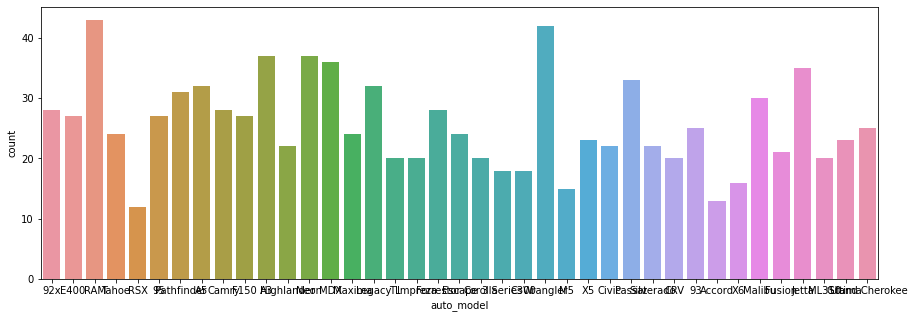

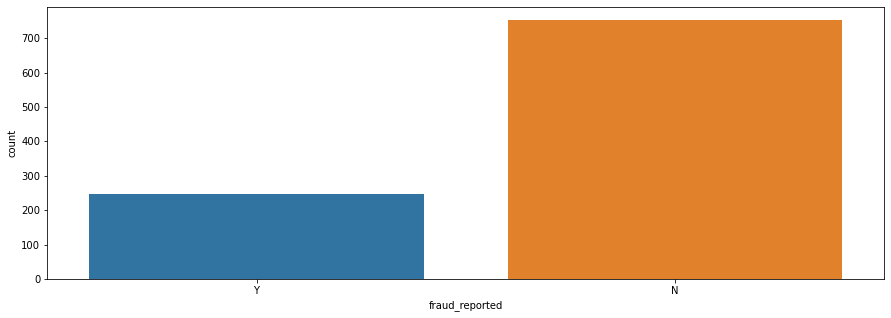

In [18]:
# Plot for categorical variables:

for i in categorical:
    plt.figure(figsize=(15,5))
    sns.countplot(data[i])
    plt.show()

Observation:
   1. OH is having maximum policy  followed by IL and IN
2. Female having more no of insurance.
3. High school is having more number of insurance followed by JD,MD and associates.
4. Rear collision is most in number.
5. Minor damages are most follwed  by total loss amd major loss.

Text(0.5, 1.0, 'fraud_reported Vs collision_type')

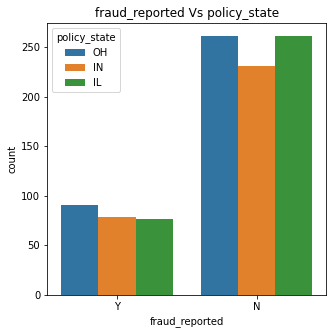

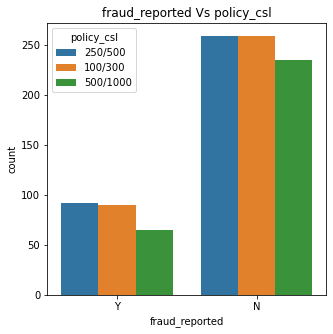

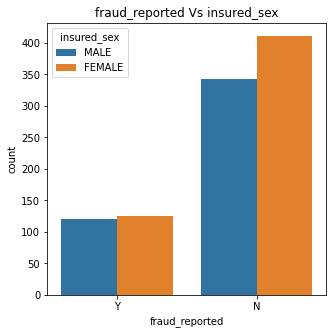

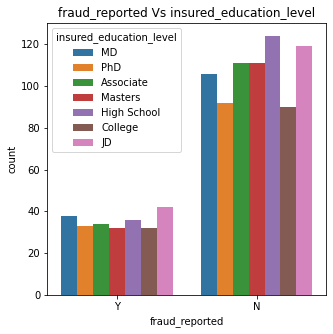

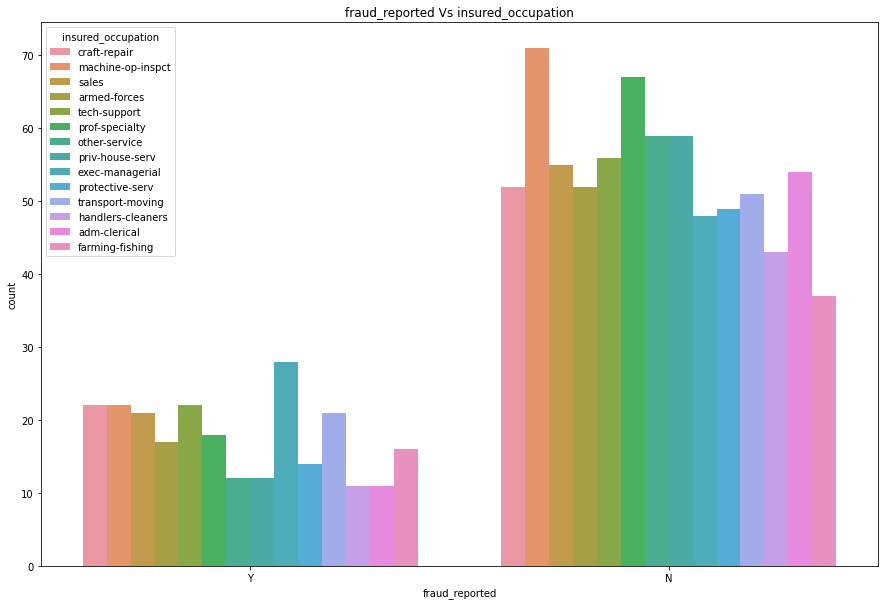

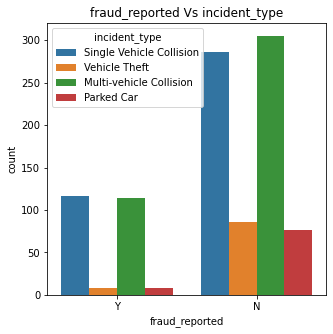

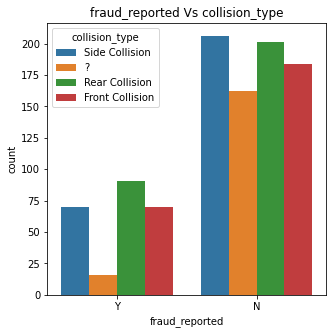

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x='fraud_reported',hue='policy_state',data=data)
plt.title('fraud_reported Vs policy_state')

plt.figure(figsize=(5,5))
sns.countplot(x='fraud_reported',hue='policy_csl',data=data)
plt.title('fraud_reported Vs policy_csl')

plt.figure(figsize=(5,5))
sns.countplot(x='fraud_reported',hue='insured_sex',data=data)
plt.title('fraud_reported Vs insured_sex')

plt.figure(figsize=(5,5))
sns.countplot(x='fraud_reported',hue='insured_education_level',data=data)
plt.title('fraud_reported Vs insured_education_level')

plt.figure(figsize=(15,10))
sns.countplot(x='fraud_reported',hue='insured_occupation',data=data)
plt.title('fraud_reported Vs insured_occupation')

plt.figure(figsize=(5,5))
sns.countplot(x='fraud_reported',hue='incident_type',data=data)
plt.title('fraud_reported Vs incident_type')

plt.figure(figsize=(5,5))
sns.countplot(x='fraud_reported',hue='collision_type',data=data)
plt.title('fraud_reported Vs collision_type')

In [20]:
data.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


# Cleaning Data

In [21]:
data.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


In [22]:
data.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


In [23]:
data.columns    # Seems some of the columns are not that required.We will identify those drop that.

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [24]:
#  Dropping the columns policy_number,policy_bind_date,incident_date,incident_location,insured_zip,incident_hour_of_the_day

data.drop('policy_number',axis=1,inplace=True)
data.drop('policy_bind_date',axis=1,inplace=True)
data.drop('incident_date',axis=1,inplace=True)
data.drop('incident_location',axis=1,inplace=True)
data.drop('insured_zip',axis=1,inplace=True)
data.drop('incident_hour_of_the_day',axis=1,inplace=True)

In [25]:
data.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


It is also visible that although there are no null values but some columns are having ? values such as
collision_type,property_damage,police_report_available

In [26]:
data.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [27]:
data.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [28]:
data.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [29]:
data['property_damage'].replace(to_replace='YES', value=1, inplace=True)
data['property_damage'].replace(to_replace='NO', value=0, inplace=True)
data['property_damage'].replace(to_replace='?', value=0, inplace=True)
data['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
data['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
data['police_report_available'].replace(to_replace='?', value=0, inplace=True)


In [30]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,0,0,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,2009,N


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [32]:
print(len(data.select_dtypes(include=['object']).columns))
data.select_dtypes(include=['object']).columns

16


Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [33]:
# Making use of LabelEncoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
data['policy_state']=le.fit_transform(data['policy_state'])
data['policy_csl']=le.fit_transform(data['policy_csl'])
data['insured_sex']=le.fit_transform(data['insured_sex'])
data['insured_education_level']=le.fit_transform(data['insured_education_level'])
data['insured_occupation']=le.fit_transform(data['insured_occupation'])
data['insured_hobbies']=le.fit_transform(data['insured_hobbies'])
data['insured_relationship']=le.fit_transform(data['insured_relationship'])
data['incident_type']=le.fit_transform(data['incident_type'])
data['collision_type']=le.fit_transform(data['collision_type'])
data['incident_severity']=le.fit_transform(data['incident_severity'])
data['authorities_contacted']=le.fit_transform(data['authorities_contacted'])
data['incident_state']=le.fit_transform(data['incident_state'])
data['incident_city']=le.fit_transform(data['incident_city'])
data['auto_make']=le.fit_transform(data['auto_make'])
data['auto_model']=le.fit_transform(data['auto_model'])
data['fraud_reported']=le.fit_transform(data['fraud_reported'])

In [35]:
data.shape

(1000, 33)

In [36]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,3,0,4,4,1,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,0,1,4,5,5,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,2,1,4,1,1,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


<AxesSubplot:>

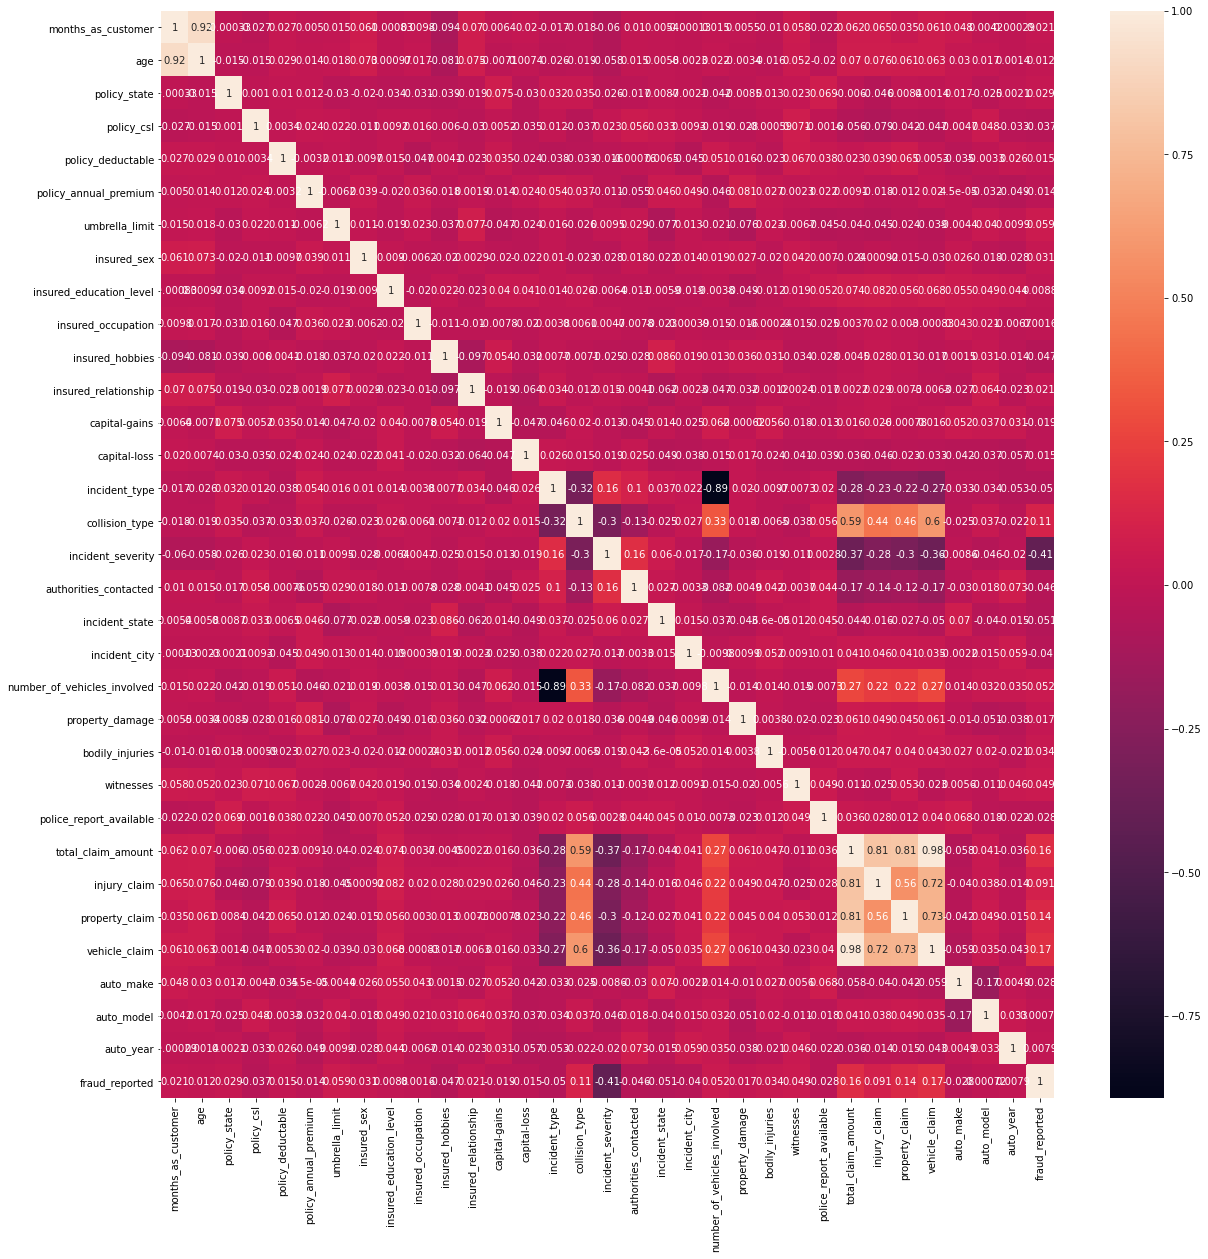

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

# Model Building

In [38]:
x=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']

In [39]:
print('x:',x.shape)
print('y:',y.shape)

x: (1000, 32)
y: (1000,)


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print('X-train shape:',x_train.shape)
print('Y-train shape:',y_train.shape)
print('X-test shape:',x_test.shape)
print('Y-test shape:',y_test.shape)

X-train shape: (800, 32)
Y-train shape: (800,)
X-test shape: (200, 32)
Y-test shape: (200,)


In [41]:
Logistic=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()



In [42]:
algo=[Logistic,DecisionTree,knn,RandomForest]
acc_models={}
for model in algo:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acu_score=accuracy_score(y_test,y_pred)
    print("-"*60)
    acc_models[model]=round(accuracy_score(y_test,y_pred)*100,1)
    print(f"The model {model} has:: \n\t Accuracy :: {round(accuracy_score(y_test,y_pred)*100,1)}% \n\t F1_score is :: {f1_score(y_test,y_pred)} \n\t Classification_Report is :: {classification_report(y_test,y_pred)} \n\t Confusion_matrix is :: {confusion_matrix(y_test,y_pred)}")
    print("-"*60)
    print("\n")

------------------------------------------------------------
The model LogisticRegression() has:: 
	 Accuracy :: 70.0% 
	 F1_score is :: 0.0 
	 Classification_Report is ::               precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200
 
	 Confusion_matrix is :: [[140   0]
 [ 60   0]]
------------------------------------------------------------


------------------------------------------------------------
The model DecisionTreeClassifier() has:: 
	 Accuracy :: 75.5% 
	 F1_score is :: 0.5811965811965812 
	 Classification_Report is ::               precision    recall  f1-score   support

           0       0.82      0.84      0.83       140
           1       0.60      0.57      0.58        60

    accuracy                      

In [43]:
acc_models

{LogisticRegression(): 70.0,
 DecisionTreeClassifier(): 75.5,
 KNeighborsClassifier(): 67.0,
 RandomForestClassifier(): 73.0}

In [44]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,20):
        cvS=cross_val_score(model,x,y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.756 at k-fold::2

Mean CV Score of model LogisticRegression():: 0.7439894984805164 at k-fold::3

Mean CV Score of model LogisticRegression():: 0.75 at k-fold::4

Mean CV Score of model LogisticRegression():: 0.748 at k-fold::5

Mean CV Score of model LogisticRegression():: 0.7490080080802252 at k-fold::6

Mean CV Score of model LogisticRegression():: 0.7490045166101503 at k-fold::7

Mean CV Score of model LogisticRegression():: 0.751 at k-fold::8

Mean CV Score of model LogisticRegression():: 0.75 at k-fold::9

Mean CV Score of model LogisticRegression():: 0.7489999999999999 at k-fold::10

Mean CV Score of model LogisticRegression():: 0.7500055500055499 at k-fold::11

Mean CV Score of model LogisticRegression():: 0.75 at k-fold::12

Mean CV Score of model LogisticRegression():: 0.7529970029970029 at k-fold::13

Mean CV Score of model LogisticRegression():: 0.7520120724346077 at k-fold::14


In [45]:
CVmodel

{'LogisticRegression()': [0.756],
 'DecisionTreeClassifier()': [0.786],
 'KNeighborsClassifier()': [0.7139868999808759],
 'RandomForestClassifier()': [0.777000777000777]}

After checking for CV and KFold also DecisionTreeClassifier is showing maximum accracy

# Now we will be hypertuning our model in order to increase the accuracy

In [46]:
DTC=DecisionTreeClassifier()

In [47]:
#Defining models and parameter
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}

grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),params,verbose=1,cv=19)


In [48]:
grid_result=grid_search.fit(x_train,y_train)

Fitting 19 folds for each of 294 candidates, totalling 5586 fits


In [49]:
print('Best_Score:',grid_result.best_score_) 
print('Best_param:',grid_result.best_params_)

Best_Score: 0.8536457422626335
Best_param: {'max_leaf_nodes': 4, 'min_samples_split': 2}


In [50]:
Y_pred_DTC_best = grid_result.predict(x_test)

In [51]:
print('Decision Tree Classifier') 
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_DTC_best) * 100, 2))
print(classification_report(y_test,Y_pred_DTC_best))
print("Cofusion matrix:",confusion_matrix(y_test,Y_pred_DTC_best))

Decision Tree Classifier
Accuracy score: 85.5
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       140
           1       0.70      0.90      0.79        60

    accuracy                           0.85       200
   macro avg       0.83      0.87      0.84       200
weighted avg       0.88      0.85      0.86       200

Cofusion matrix: [[117  23]
 [  6  54]]


In [52]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [53]:
pred_probability=grid_result.predict_proba(x_test)[:,1]
pred_probability

array([0.04347826, 0.85106383, 0.58685446, 0.04347826, 0.03355705,
       0.85106383, 0.85106383, 0.58685446, 0.04347826, 0.58685446,
       0.04347826, 0.04347826, 0.04347826, 0.85106383, 0.04347826,
       0.04347826, 0.85106383, 0.04347826, 0.03355705, 0.04347826,
       0.58685446, 0.03355705, 0.04347826, 0.58685446, 0.85106383,
       0.03355705, 0.04347826, 0.58685446, 0.04347826, 0.58685446,
       0.03355705, 0.04347826, 0.04347826, 0.04347826, 0.85106383,
       0.04347826, 0.03355705, 0.58685446, 0.04347826, 0.04347826,
       0.04347826, 0.58685446, 0.04347826, 0.58685446, 0.58685446,
       0.03355705, 0.04347826, 0.03355705, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.58685446, 0.04347826, 0.04347826,
       0.04347826, 0.58685446, 0.04347826, 0.04347826, 0.04347826,
       0.03355705, 0.03355705, 0.58685446, 0.58685446, 0.04347826,
       0.04347826, 0.04347826, 0.58685446, 0.58685446, 0.58685446,
       0.03355705, 0.58685446, 0.04347826, 0.58685446, 0.04347

In [54]:
fpr,tpr,thresholds=roc_curve(y_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.01428571 0.16428571 0.83571429 1.        ]


[0.         0.2        0.9        0.98333333 1.        ]


[1.85106383 0.85106383 0.58685446 0.04347826 0.03355705]


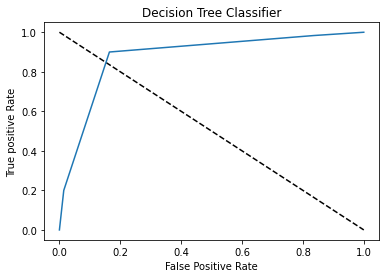

In [55]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

# Hyper tuning of Decision Tree cLassifier Model has increased the accuracy from 78% to 85%

# Also we will Hypertune The Random Forest MODEL

In [56]:
RF=RandomForestClassifier()

In [57]:
n_estimators=[100,300,500,800]
max_depth=[5,8,10,11,15]
min_samples_split=[2,5,10,15]
min_samples_leaf=[1,2,4,5,8]


In [58]:
grid_search_RF=GridSearchCV(RandomForestClassifier(random_state=42),dict(n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_samples_split=min_samples_split,
                         min_samples_leaf=min_samples_leaf),
                        cv=3,verbose=1,n_jobs=-1)

In [59]:
grid_result_RF=grid_search_RF.fit(x_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [60]:
print('Best_Score:',grid_result_RF.best_score_) 
print('Best_param:',grid_result_RF.best_params_)

Best_Score: 0.7912290088517172
Best_param: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 500}


In [61]:
Y_pred_RF_best = grid_result_RF.predict(x_test)

In [62]:
print('Random Forest') 
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_RF_best) * 100, 2))
print(classification_report(y_test,Y_pred_RF_best))
print("Cofusion matrix:",confusion_matrix(y_test,Y_pred_RF_best))

Random Forest
Accuracy score: 71.5
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       140
           1       0.59      0.17      0.26        60

    accuracy                           0.71       200
   macro avg       0.66      0.56      0.54       200
weighted avg       0.69      0.71      0.65       200

Cofusion matrix: [[133   7]
 [ 50  10]]


In [63]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [64]:
pred_probability=grid_result_RF.predict_proba(x_test)[:,1]
pred_probability

array([0.08494924, 0.26721367, 0.52875191, 0.13193546, 0.12709631,
       0.28579234, 0.28035021, 0.50098925, 0.14823905, 0.48847379,
       0.18267338, 0.05933687, 0.18217264, 0.25389781, 0.08750672,
       0.14149918, 0.34478558, 0.12295237, 0.21032567, 0.15407593,
       0.37259433, 0.21784571, 0.07961925, 0.44107042, 0.22982122,
       0.14219182, 0.0354879 , 0.43206519, 0.1163544 , 0.49452873,
       0.04486237, 0.18339119, 0.12056523, 0.11905477, 0.28127088,
       0.02381755, 0.11095238, 0.43387662, 0.14093974, 0.09238487,
       0.16723022, 0.51467077, 0.08790111, 0.44138471, 0.53024859,
       0.16485388, 0.10979555, 0.22922908, 0.07666668, 0.13661521,
       0.20024371, 0.14792199, 0.55252306, 0.0212922 , 0.14877775,
       0.11890005, 0.51141919, 0.07601327, 0.20697793, 0.11230833,
       0.20399978, 0.17789806, 0.5539472 , 0.51620362, 0.14995314,
       0.02419462, 0.02867841, 0.46884509, 0.39366824, 0.36289329,
       0.19945906, 0.43699161, 0.12381748, 0.47038235, 0.08762

In [65]:
fpr,tpr,thresholds=roc_curve(y_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.         0.         0.02142857 0.02142857 0.02857143
 0.02857143 0.03571429 0.03571429 0.04285714 0.04285714 0.05
 0.05       0.05714286 0.05714286 0.06428571 0.06428571 0.07142857
 0.07142857 0.11428571 0.11428571 0.12857143 0.12857143 0.13571429
 0.13571429 0.14285714 0.14285714 0.15       0.15       0.15714286
 0.15714286 0.17142857 0.17142857 0.18571429 0.18571429 0.19285714
 0.19285714 0.2        0.2        0.49285714 0.49285714 0.51428571
 0.51428571 0.91428571 0.91428571 0.92857143 0.92857143 0.96428571
 0.96428571 1.         1.        ]


[0.         0.01666667 0.03333333 0.03333333 0.05       0.05
 0.08333333 0.08333333 0.1        0.1        0.15       0.15
 0.16666667 0.16666667 0.2        0.2        0.23333333 0.23333333
 0.35       0.35       0.43333333 0.43333333 0.46666667 0.46666667
 0.55       0.55       0.65       0.65       0.68333333 0.68333333
 0.71666667 0.71666667 0.83333333 0.83333333 0.86666667 0.86666667
 0.88333333 0.88333333 0.9        0.9      

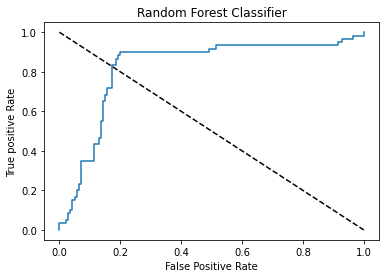

In [66]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Random Forest Classifier')
plt.show()

# Hence seeing the accuracy score we decided to choose  Decision Tree Classifier  model with 85% accuracy to predict the fraud Cases.

In [67]:
import pickle

In [68]:
filename="Automobile Insurance fraud Detection"
pickle.dump(DTC, open(filename,'wb'))